# Linear Regression

*This notebook is to relearn Linear Regression from scratch*

Overview: Linear Regression model learn to create a straight (linear) generally describe the trend of all data points. The general equation of linear:  
    
$$Y = wX + b$$

From there, the model can predict the value of correspond Y based if new given X.


In [2]:
import numpy as np                  # for calculation
import pandas as pd                 # for data handling (csv)
import matplotlib.pyplot as plt     # for plot, visualization, chart & graphs

In [3]:
# one variable linear regression
df = pd.read_csv("data/Salary_dataset.csv")
df = df.iloc[:, 1:]
df.count(), df.head()

(YearsExperience    30
 Salary             30
 dtype: int64,
    YearsExperience   Salary
 0              1.2  39344.0
 1              1.4  46206.0
 2              1.6  37732.0
 3              2.1  43526.0
 4              2.3  39892.0)

## Simple Linear Regression

The model predict output $\hat{y}$ based on a single input X value


### State the problem

To synthesize the equation that it's visualize line fit the trend of data, we need to find the value of weight ($w$)
Given a pair of data $(x, y)$, we need to find the proper value of $w$ that prediced value of $\hat{y} = wx +b$ close to ground-truth value of $y$


### Solution



To quantify the difference between prediction $\hat{y}$ and ground-truth $y$, we define the Loss Function as follow:

$$ L(w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i) ^ 2 $$

Minimize the difference between prediction $\hat{y}$ and ground-truth $y$ means minimize the result of loss function given the variable weight $(w)$.
In math, the value of variable that minimize the output of the function is the value that cause its derivative = 0
Derivative if $L(w)$ is:

$$ \frac{dL(w)}{dw} = \frac{2}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot \frac{d\hat{y}_i}{dw} $$
$$ \Leftrightarrow \frac{dL(w)}{dw} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i $$

To find the optimal weight $(w)$

$$ \frac{dL(w)}{dw} = 0 $$
$$ \Leftrightarrow \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i) x_i}{n} = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_i - w x_i - b) x_i}{n} = 0 $$
$$ \Leftrightarrow \frac{\sum_{i=1}^{n} (y_ix_i - w x_i ^ 2 - bx_i)}{n} = 0 $$
$$ \Leftrightarrow \sum_{i=1}^{n} (y_ix_i - w x_i ^ 2 - bx_i) = 0 $$
$$ \Leftrightarrow \sum_{i=1}^{n} w x_i ^ 2 = \sum_{i=1}^{n} y_ix_i - bx_i $$
$$ \Leftrightarrow w = \sum_{i=1}^{n} \frac{y_ix_i - bx_i}{x_i ^ 2} $$

### Example: Predict *salary* based on *years of Experience*

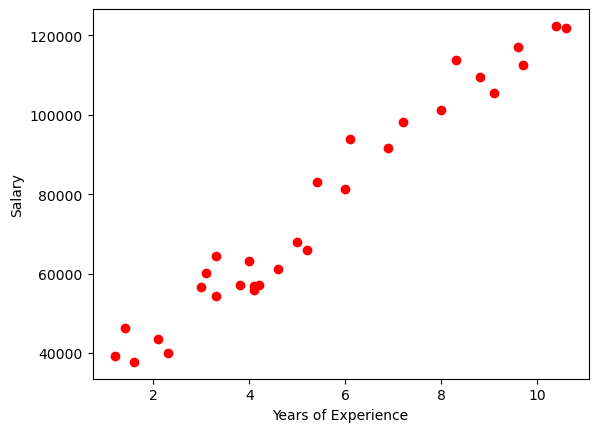

In [4]:
# plot data
X = df["YearsExperience"].to_numpy()
Y = df["Salary"].to_numpy()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X, Y, "ro")

In [5]:
bias = 0.1
w = ((Y * X).sum() - bias * X.sum()) / (X ** 2).sum() # compute w

Text(0, 0.5, 'Salary')

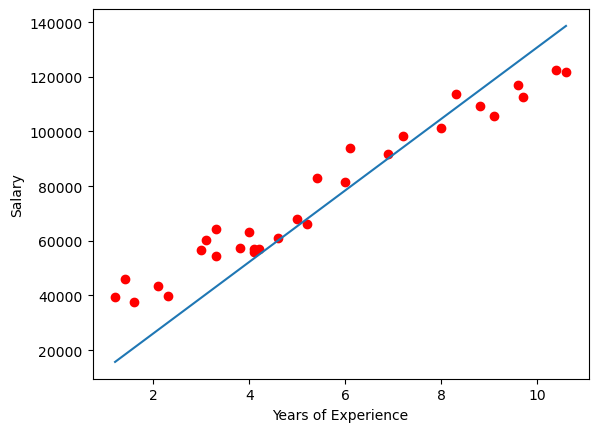

In [6]:
# visualize the equation with computed w
vis_x = np.linspace(np.min(X), np.max(X), 100)
vis_y = np.linspace((np.min(X) * w), (np.max(X)*w), 100)
plt.plot(X, Y, "ro")
plt.plot(vis_x, vis_y, label=f'y = {w}x')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

It seems that we have found the correct $w$ value, the equation perfectly describe training data trend!

In [7]:
# Test on train data
input = X[11]
ground_truth = Y[11]
prediction = input * w + bias
print('Years of Experience: {} -> predicted Salary: {} - ground-truth Salary: {}'.format(input, prediction, ground_truth))

Years of Experience: 4.1 -> predicted Salary: 53614.325344213976 - ground-truth Salary: 55795.0


## Multiple Linear Regression

Type of Linear Regression where the prediction is based on more than one factors.
$$ y = w_1x_1 + w_2x_2 + ... + w_px_p + b $$

Where: 
- $p$: number of factors
- $b$: bias

*For this intuition, let's consider only 2 weights model*
$$ y = w_1x_1 + w_2x_2 + b $$

Loss function:
$$ L(w_1, w_2) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y_i}) ^ 2 $$

### Solution 1: Compute each $w (w1,w2,...)$ using partial derivative of loss function

Partial derivatives:
$$ \frac{dL(w_1)}{dw_1} = \sum_{i=1}^{n} [y_i - (x_{1i}w_1 + x_{2i}w_2 + b)] \frac{d[y_i - (x_{1i}w_1 + x_{2i}w_2 + b)]}{dw_1} = 0 $$
$$ \frac{dL(w_1)}{dw_1} = \sum_{i=1}^{n} x_{1i}y_i - x_{1i}^2w_1 - x_{1i}x_{2i}w_2 - x_{1i}b $$

$$ \frac{dL(w_2)}{dw_1} = \sum_{i=1}^{n} [y_i - (x_{1i}w_1 + x_{2i}w_2 + b)] \frac{d[y_i - (x_{1i}w_1 + x_{2i}w_2 + b)]}{dw_2} = 0 $$
$$ \frac{dL(w_2)}{dw_1} = \sum_{i=1}^{n} x_{2i}y_i - x_{1i}x_{2i}w_1 - x_{2i}^2w_2 - x_{2i}b $$

Compute each weight wrt each partial derivative equal 0
$$ \frac{dL(w_1)}{dw_1} = 0  
\Leftrightarrow \sum_{i=1}^{n} - x_{1i}y_i + x_{1i}^2w_1 + x_{1i}x_{2i}w_2 + x_{1i}b = 0
\Leftrightarrow w_1 = \sum_{i=1}^{n} \frac{x_{1i}y_i - x_{1i}x_{2i}w_2 - x_{1i}b}{x_{1i}^2} $$

$$ \frac{dL(w_2)}{dw_2} = 0  
\Leftrightarrow \sum_{i=1}^{n} - x_{2i}y_i + x_{1i}x_{2i}w_1 + x_{2i}^2w_2 + x_{2i}b = 0
\Leftrightarrow w_2 = \sum_{i=1}^{n} \frac{x_{2i}y_i - x_{1i}x_{2i}w_1 - x_{2i}b}{x_{2i}^2} $$

*After trying to generate the equation to compute each weight $w1, w2$ independently, I realize the conflict*

*w1 formula contains w2 and w2 formula contain w1 -> w1 depend on w2 and w2 depend on w2* 
** => it cannot be solved independently; IT MUST BE SOLVE SIMULTANOUSLY**

### Solution 2: Compute all the weights $W (w1, w2, b)$ simultaneously using MATRIX ALGEBRA

Since we are about to use matrix algebra, we need to represent everything in matrix

$$

X \in \mathbb{R}^{3 \times 2} = \begin{bmatrix} x_{11} & x_{12} & 1 \\ x_{21} & x_{22} & 1 \end{bmatrix} \\

Y \in \mathbb{R}^{1 \times 2} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \\

W \in \mathbb{R}^{3 \times 1} = [w_1, w_2, b]

$$

The Loss function is now:

$$

L(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) ^ 2 = (Y - X\cdot W) ^2

$$

And with the property of dot product that dot product of vector and its transpose equal to squared L2 Norm (check Mathematic Notes #2) 

$$

L(w) = (Y - X\cdot W)^T(Y - X\cdot W)

$$

Same as before, to obtain minimal L(w), we need to find W that cause the derivative of L: $∇_wL(w) = 0$

$$ ∇_wL(w) = 0 $$ 

$$ \Leftrightarrow (Y - X\cdot W)^T(Y - X\cdot W) = 0 $$

$$ \Leftrightarrow Y^TY - 2Y^TXW + (XW)^T(XW) = 0 $$

*Here, calculating the derivative of equation contain matrix is different from calculating the derivative of equation contain scalar variable (x,y,...)*

*Since multiply 2 matrix is dot product, not normal multiplication, the derivatives have to pay attention to matrixes' shape*

**_!!! Look deeply into this require deep understanding of matrix algebra_**

Now we take derivatives term-by-term

$$ Y^TY - 2Y^TXW + (XW)^T(XW) = 0 $$

$$ \Leftrightarrow 0 - 2X^TY + 2X^TXW = 0 $$

$$ \Leftrightarrow X^TXW - X^TY = 0 $$

$$ \Leftrightarrow W = \frac{X^TY}{X^TX} $$

$$ \Leftrightarrow W = (X^TX)^{-1}X^TY $$



### Let's use the final equation above to find the optimal weight

#### Start with simple 2-factors examples

In [41]:
# Data
# X = [study time, IQ]
# Y = [Average mark]

X = np.array([
    [8, 120],
    [10, 120],
    [12, 130],
    [15, 150],
    [20, 160],
    [20, 180]
])

Y = np.array([7.5, 7.75, 8.0, 8.5, 8.75, 9.5])

# add bias node to X
bias_node = np.ones((X.shape[0], 1), dtype=np.int64)
updated_X = np.concatenate((X, bias_node), axis=1)

X.shape, updated_X.shape, Y.shape

((6, 2), (6, 3), (6,))

In [36]:
optimal_W = (np.linalg.inv(updated_X.transpose() @ updated_X)) @ (updated_X.transpose() @ Y) 
optimal_W

array([-4.97379915e-14,  3.01136364e-02,  4.01704545e+00])

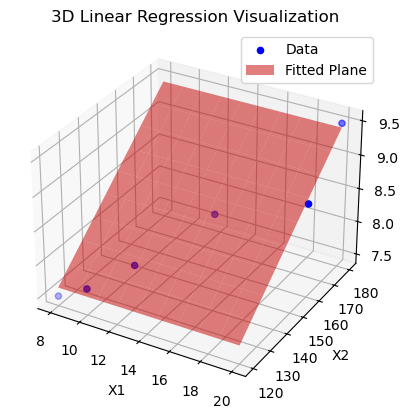

In [40]:
# plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of real data
X1 = X[:, 0]
X2 = X[:, 1]
ax.scatter(X1, X2, Y, color='blue', label='Data')

# Create meshgrid for surface
X1_range = np.linspace(X1.min(), X1.max(), 10)
X2_range = np.linspace(X2.min(), X2.max(), 10)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
Y_pred = optimal_W[-1] + optimal_W[0] * X1_grid + optimal_W[1] * X2_grid

# Plot regression surface
ax.plot_surface(X1_grid, X2_grid, Y_pred, color='red', alpha=0.5, label='Fitted Plane')


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title('3D Linear Regression Visualization')
plt.legend()
plt.show()

#### Multi-factors example

In [12]:
# Load data

df = pd.read_csv('data/Student_Performance.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [48]:
Y = df['Performance Index'].to_numpy()
X = df.drop(columns=['Performance Index']).to_numpy()

# add bias node to X
bias_node = np.ones((X.shape[0], 1), dtype=np.int64)
updated_X = np.concatenate((X, bias_node), axis=1)

updated_X, updated_X.shape, Y, Y.shape

(array([[ 7, 99,  1,  9,  1,  1],
        [ 4, 82,  0,  4,  2,  1],
        [ 8, 51,  1,  7,  2,  1],
        ...,
        [ 6, 83,  1,  8,  5,  1],
        [ 9, 97,  1,  7,  0,  1],
        [ 7, 74,  0,  8,  1,  1]]),
 (10000, 6),
 array([91., 65., 45., ..., 74., 95., 64.]),
 (10000,))

In [46]:
optimal_W = (np.linalg.inv(updated_X.transpose() @ updated_X)) @ (updated_X.transpose() @ Y) 
optimal_W

array([  2.85298205,   1.01843419,   0.61289758,   0.48055975,
         0.19380214, -34.07558809])

In [57]:
expand_w = np.expand_dims(optimal_W, 1)
Y_pred = updated_X @ expand_w

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 1], X[:, 2], Y, color='blue', label="Actual")
ax.scatter(X[:, 1], X[:, 2], Y_pred, color='red', label="Predicted")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("3D Linear Regression View")
ax.legend()
plt.show()

KeyboardInterrupt: 

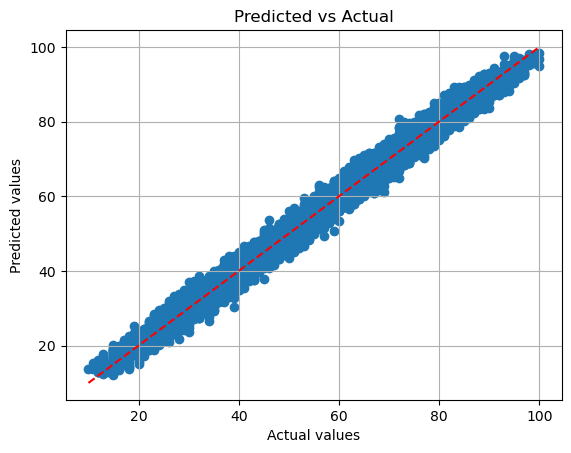

In [54]:
# Visualize

expand_w = np.expand_dims(optimal_W, 1)
Y_pred = updated_X @ expand_w


plt.scatter(Y, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')  # ideal line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

## Discussion

1. Why do we compute $y - \hat{y}$ instead of $\hat{y} - y$
2. What is the weakness of linear regression

## Mathematical Notes

**1. MSE Loss and L2 Norm are related, but not the same**

MSE Loss is based on the square of L2 Norm

L2 Norm:
$$ \| y - \hat{y} \| = \sqrt{\sum_{i=1}^{n} (y_i - \hat{y_i}) ^ 2} $$

MSE Loss:

$$ \frac{1}{n} \| y - \hat{y} \| ^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) ^ 2 $$

**2. Squared L2 Norm of a vector equal dot product of that vector and its transpose**

$$ L2 Norm = \|v\| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2} $$
$$ \Leftrightarrow \|v\|^2 = v_1^2 + v_2^2 + ... + v_n^2 = v^T v $$

*Breakdown:*

$$ v = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} $$
$$ v^T v = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} [v_1 v_2 v_3] = v_1v_1 + v_2v_2 + v_3v_3 = v_1^2 + v_3^2 + v_3^2$$




And $v = (y - \hat{y})$
$$ \Leftrightarrow \| y - \hat{y} \| ^ 2 = (y_1 - \hat{y_1}) ^ 2 + (y_2 - \hat{y_2}) ^ 2 + ... + (y_n - \hat{y_n}) ^ 2 = \sum_{i=1}^{n} (y - \hat{y}) ^ 2  $$